<a href="https://colab.research.google.com/github/almedida/thesis/blob/main/limma_ttest_10k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Install tools**##

In [1]:
#install BiocManager
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

#install limma and qvalue packages
BiocManager::install(c("limma", "qvalue"))
library(limma)
library(qvalue)

install.packages('pacman')
library(pacman, devtools)
p_load("tidyverse", "matrixTests", "gtools", "VennDiagram")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'BiocVersion', 'limma', 'qvalue'

also installing the dependencies ‘plyr’, ‘reshape2’


Old packages: 'pbdZMQ', 'brew', 'dplyr', 'generics', 'pillar', 'readr',
  'rlang', 'svglite', 'tidyr'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘matrixStats’



matrixTests installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


gtools installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘formatR’, ‘lamb

##**Load data**##

**gene expression analysis for the 2 levels (group 1 and 2)**

In [12]:

genes_exp_10k = read.table("10k_genes_group1_2.csv", header= TRUE, sep=",")
#genes_exp_10k = genes_exp_10k[, -1]
head(genes_exp_10k)


,X,GSM1247270,GSM1247369,GSM1247331,GSM1247364,GSM1247245,GSM1247216,GSM1247412,GSM1247389
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17401,7.440661,6.980917,7.245719,7.191339,7.281503,7.235446,7.332173,7.097853
2,4775,4.125719,4.080995,3.819399,4.104383,4.127808,4.584075,4.180370,3.777045
3,13218,7.896658,8.193822,8.064172,7.637587,7.935946,7.795728,7.634784,7.370020
4,10539,7.710653,6.906425,7.321344,7.207895,7.256062,7.494608,6.647726,6.818447
5,8462,6.211932,6.102299,5.840452,5.439352,5.813072,5.418977,5.989962,5.462583
6,4050,10.423190,11.512620,11.124810,10.188600,10.446420,9.349102,10.694180,10.714950


**Sorted data**

In [25]:
genes_exp_10k_sorted = read.table("10k_genes_group1_2_sorted.csv", header= TRUE, sep=",")
genes_exp_10k_sorted = genes_exp_10k_sorted[, -1]
head(genes_exp_10k_sorted)


,GSM1247270,GSM1247369,GSM1247331,GSM1247364,GSM1247245,GSM1247216,GSM1247412,GSM1247389
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.817677,6.514915,5.388687,5.782911,7.294158,6.906492,6.250236,6.638433
2,8.853257,8.704396,9.377953,8.732246,10.633180,10.581575,10.010287,10.712774
3,7.013458,7.076799,6.805468,7.029274,7.224860,7.496177,7.548582,6.992288
4,7.360748,7.008969,7.180487,7.098370,6.953448,7.119632,7.192184,6.960319
5,7.324947,7.345208,7.249547,7.282897,7.142798,7.181086,7.268388,7.156984
6,6.301717,5.763372,6.041736,6.394681,5.832879,5.611746,6.014682,5.731933


##**Create expression list**##

create a factor list for the differentially expressed genes with group1 set as first level

In [7]:
expr_list_10k <- factor(
  x = c(rep("group1",4), rep("group2",4)),
  levels=c("group1","group2")            # Set group 1 to be the first level
)

design <- model.matrix(~expr_list_10k)          # Remove the zero
head(design)

,(Intercept),expr_list_10kgroup2
1,1,0
2,1,0
3,1,0
4,1,0
5,1,1
6,1,1


In [8]:
#Now we can run the differential expression pipeline

fit <- lmFit(genes_exp_10k, design)
fit <- eBayes(fit)
results <- decideTests(fit)
write.csv(summary(results), "summary_10k_genes_expr.csv")


differentially expressed genes

In [10]:
write.csv(topTable(fit, coef="expr_list_10kgroup2", n=10000), "10k_limma_expr_list.csv")

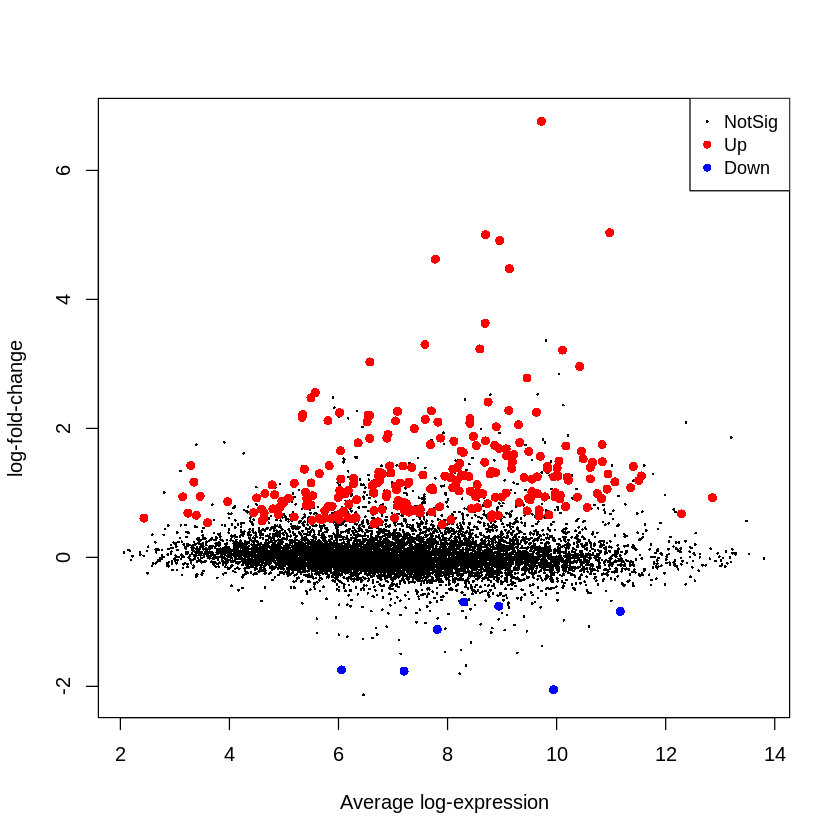

In [11]:

#visualization of the results
plotMD(fit, coef="expr_list_10kgroup2", status=results)


# **Sorted data**

In [26]:
expr_list_10k_sorted <- factor(
  x = c(rep("group1",4), rep("group2",4)),
  levels=c("group1","group2")            # Set group 1 to be the first level
)

design_sorted <- model.matrix(~expr_list_10k_sorted)          # Remove the zero
head(design_sorted)

,(Intercept),expr_list_10k_sortedgroup2
1,1,0
2,1,0
3,1,0
4,1,0
5,1,1
6,1,1


**Sorted data**

In [27]:
#Now we can run the differential expression pipeline

fit_sorted <- lmFit(genes_exp_10k_sorted, design_sorted)
fit_sorted <- eBayes(fit_sorted)
results_sorted <- decideTests(fit_sorted)
write.csv(summary(results_sorted), "summary_10k_genes_expr_sorted.csv")

In [30]:
write.csv(topTable(fit_sorted, coef="expr_list_10k_sortedgroup2", n=10000), "10k_limma_expr_list_sorted.csv")

##**Intersection method using ajusted pvalues from limms test**##

* visualization of the results using intersection method on the adjusted p-values from limma test 
* excel was used to do the intersection method analysis


In [ ]:
#adjusted p-values <=0.01
draw.pairwise.venn(area1=21245, area2=7520,cross.area=3723,
                   category=c("Kidney","Liver"),fill=c("Red","Green"),
)


#adjusted p-values <=0.05
draw.pairwise.venn(area1=27350, area2=12989,cross.area=8144,
                   category=c("Kidney","Liver"),fill=c("Red","Green"),
)

#adjusted p-values <=0.1
draw.pairwise.venn(area1=30168, area2=16461,cross.area=11382,
                   category=c("Kidney","Liver"),fill=c("Red","Green"),
)